# Aspect-Based Sentiment Analysis of Tweets Directed at Brands and Products using Natural Language Processing.

# 1 Business Understanding 
## 1.1 Business Overview
Social media platforms like Twitter are where people openly share their thoughts, complaints, and praise about products and brands. These conversations show how customers truly feel and what matters to them. For big companies like Apple and Google, understanding this feedback is key to improving products and maintaining a strong brand image.

According to Aga Khan University (2022),https://ecommons.aku.edu/cgi/viewcontent.cgi?article=1069&context=etd_ke_gsmc_ma-digjour, analyzing social media discussions gives organizations valuable insights into consumer attitudes and market trends that support smarter business decisions. Listening to what people say online helps companies respond faster, build trust, and stay connected to their customers.

## 1.2 Problem Statement
Apple and Google continuously monitor customer satisfaction to stay ahead in the technology market. However, given the massive volume and speed of data generated on Twitter, manual tracking of sentiment is impractical. Without automated systems, valuable insights into customer satisfaction, emerging issues, and product perception may be overlooked.

This project aims to address this challenge by developing a machine learning model capable of classifying tweets related to Apple and Google as positive, negative, or neutral. The outcome will support organizations in understanding real-time consumer opinions, measuring brand perception, and identifying areas for improvement based on public feedback.

## 1.3 Business Objective
### 1.3.1 Main objective:
To develop an NLP-based sentiment analysis model that automatically classifies tweets about Apple and Google into positive, negative, or neutral categories.

### 1.3.2 Specific objectives:
1. To explore and clean the tweet dataset, handling missing values, duplicates, and irrelevant characters.

2. To preprocess textual data through tokenization, stopword removal, and lemmatization.

3. To convert cleaned text into numerical features using appropriate vectorization techniques such as TF-IDF or Word2Vec.

4. To train and evaluate multiple classification algorithms (e.g., Logistic Regression, Naive Bayes, SVM) to identify the best-performing model.

5. To interpret and visualize model predictions, identifying which features most influence positive and negative sentiment.

6. To provide actionable insights that can guide Apple and Google in improving customer experience and brand perception.
## 1.4 Research Questions
1. How can the dataset be explored and cleaned to ensure data quality and reliability for sentiment analysis?

2. What preprocessing techniques are most effective for preparing Twitter text data for modeling?

3. Which text vectorization method (e.g., TF-IDF) produces better numerical representations for tweet classification?

4. Which classification algorithms yield the highest accuracy and robustness in predicting tweet sentiment?

5. Which textual features (words, phrases, or hashtags) most strongly influence model predictions of sentiment?

6. How can the resulting sentiment insights be applied by Apple and Google to improve customer satisfaction and brand reputation?
## 1.5 Success Criteria
Model Performance: Achieve at least 85% classification accuracy and a macro F1-score ≥ 0.80 across all sentiment classes (positive, negative, neutral).

Model Interpretability: Clearly explain which features (words, hashtags, expressions) most affect sentiment predictions using tools such as LIME or SHAP.

Business Value: Provide insights that help Apple and Google understand customer sentiment, identify common issues, and track brand reputation effectively




## 2. Data Understanding
### 2.1 Data overview
The dataset contains 9,093 tweets collected from crowdFlower, with the goal of identifying whether the emotion in a tweet is directed at a brand or product, and if so, what sentiment it carries. It includes 3 columns,
- tweet_text:  The raw text of the tweet, expressing user opinions or emotions.
- emotion_in_tweet_is_directed_at: The specific brand or product the emotion is directed at (if identified)
- is_there_an_emotion_directed_at_a_brand_or_product: Indicates whether the tweet expresses emotion toward a brand/product


### data characteristics
- Number of rows: 9,093
- Number of columns: 3
- Data types: All columns are of type object (textual).
- Target variable: is_there_an_emotion_directed_at_a_brand_or_product.
- Feature variable: tweet_text.
- Filtering scope: Tweets directed at Apple or Google will be selected for analysis.

our target variable includes various sentiment  labels such as Positive emotion, Negative emotion, and No emotion toward brand or product.



In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import re
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("judge-1377884607_tweet_product_company.csv", encoding="latin1")
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [3]:
#list all columns
df.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

In [4]:
#df.shape
df.shape

(9093, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


All columns are object type,the tweet_text has i missing row,the emotion directed at column has alot of missing values with only 3291 non-null.

In [6]:
#finding missing values
df.isnull().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [7]:
#finding the percentage of missing values
df.isnull().sum()/df.shape[0] * 100

tweet_text                                             0.010997
emotion_in_tweet_is_directed_at                       63.807324
is_there_an_emotion_directed_at_a_brand_or_product     0.000000
dtype: float64

In [8]:
#finding duplicates
df.duplicated().sum()

22

In [9]:
# removing duplicates
df.drop_duplicates(inplace=True)
#rechecking duplicates
df.duplicated().sum()


0

In [10]:
# df.describe
df.describe()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,9070,3282,9071
unique,9065,9,4
top,RT @mention RT @mention It's not a rumor: Appl...,iPad,No emotion toward brand or product
freq,2,945,5376


In [11]:
#descriprtive statistics
df.describe(include='object')

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,9070,3282,9071
unique,9065,9,4
top,RT @mention RT @mention It's not a rumor: Appl...,iPad,No emotion toward brand or product
freq,2,945,5376


In [12]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].unique().tolist()

['Negative emotion',
 'Positive emotion',
 'No emotion toward brand or product',
 "I can't tell"]

The target variable contains 4 sentiment classes.The Negative emotion,Positive emotion,No emotion toward brand or product and the i can't tell.

In [13]:
df['emotion_in_tweet_is_directed_at'].unique().tolist()

['iPhone',
 'iPad or iPhone App',
 'iPad',
 'Google',
 nan,
 'Android',
 'Apple',
 'Android App',
 'Other Google product or service',
 'Other Apple product or service']

### Handling missing values

After identifying the missing values based on their percentages and importance of the column we will drop the single missing row.

In [14]:
# handling missing values
# Dropping the single missing row in tweet_text
df = df.dropna(subset=['tweet_text'])
df.isnull().sum()


tweet_text                                               0
emotion_in_tweet_is_directed_at                       5788
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [15]:
# Filtering the "emotion is directed at" to Keep Apple and Google tweets only.
df = df[df['emotion_in_tweet_is_directed_at'].isin(['Apple', 'Google'])]
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion
38,@mention - False Alarm: Google Circles Not Co...,Google,Negative emotion
40,@mention - Great weather to greet you for #sx...,Apple,Positive emotion
47,HOORAY RT ÛÏ@mention Apple Is Opening A Pop-U...,Apple,Positive emotion
...,...,...,...
9029,"[TOP STORY] At #SXSW, Apple schools the market...",Apple,Positive emotion
9033,@mention yep! I can't believe they set up a po...,Apple,Positive emotion
9048,@mention You bet man! Kindle and Apple for sur...,Apple,Positive emotion
9064,@mention you should see the line here at #SXSW...,Apple,Positive emotion


In [16]:
# rechecking the missing values
df.isnull().sum()

tweet_text                                            0
emotion_in_tweet_is_directed_at                       0
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64

In [17]:
# Tweet length analysis(number of characters in tweet)
df['tweet_length'] = df['tweet_text'].str.len()
df


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,tweet_length
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,131
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion,88
38,@mention - False Alarm: Google Circles Not Co...,Google,Negative emotion,119
40,@mention - Great weather to greet you for #sx...,Apple,Positive emotion,144
47,HOORAY RT ÛÏ@mention Apple Is Opening A Pop-U...,Apple,Positive emotion,91
...,...,...,...,...
9029,"[TOP STORY] At #SXSW, Apple schools the market...",Apple,Positive emotion,125
9033,@mention yep! I can't believe they set up a po...,Apple,Positive emotion,92
9048,@mention You bet man! Kindle and Apple for sur...,Apple,Positive emotion,91
9064,@mention you should see the line here at #SXSW...,Apple,Positive emotion,125


In [18]:
# adding the number of words in tweet column
df['word_count'] = df['tweet_text'].apply(lambda x: len(str(x).split()))
df


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,tweet_length,word_count
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,131,17
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion,88,16
38,@mention - False Alarm: Google Circles Not Co...,Google,Negative emotion,119,18
40,@mention - Great weather to greet you for #sx...,Apple,Positive emotion,144,23
47,HOORAY RT ÛÏ@mention Apple Is Opening A Pop-U...,Apple,Positive emotion,91,16
...,...,...,...,...,...
9029,"[TOP STORY] At #SXSW, Apple schools the market...",Apple,Positive emotion,125,19
9033,@mention yep! I can't believe they set up a po...,Apple,Positive emotion,92,20
9048,@mention You bet man! Kindle and Apple for sur...,Apple,Positive emotion,91,17
9064,@mention you should see the line here at #SXSW...,Apple,Positive emotion,125,24


In [19]:
# View summary statistics
print(df['tweet_length'].describe())

count    1087.000000
mean      107.690892
std        28.154731
min        37.000000
25%        86.000000
50%       113.000000
75%       130.000000
max       170.000000
Name: tweet_length, dtype: float64


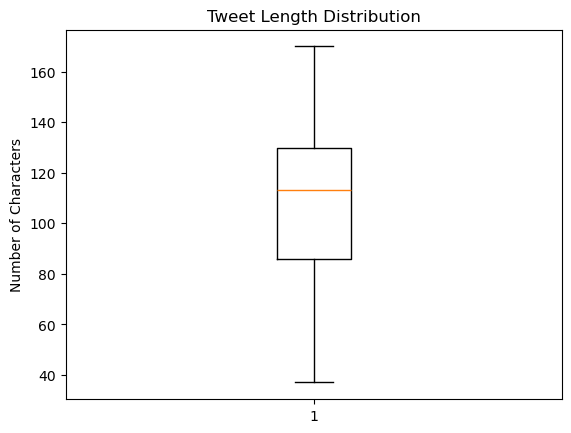

In [20]:
# tweet length distribution plot
plt.boxplot(df['tweet_length'])
plt.title('Tweet Length Distribution')
plt.ylabel('Number of Characters')
plt.show()

In [21]:
print(df['word_count'].describe())


count    1087.000000
mean       18.049678
std         4.894214
min         5.000000
25%        14.000000
50%        19.000000
75%        22.000000
max        33.000000
Name: word_count, dtype: float64


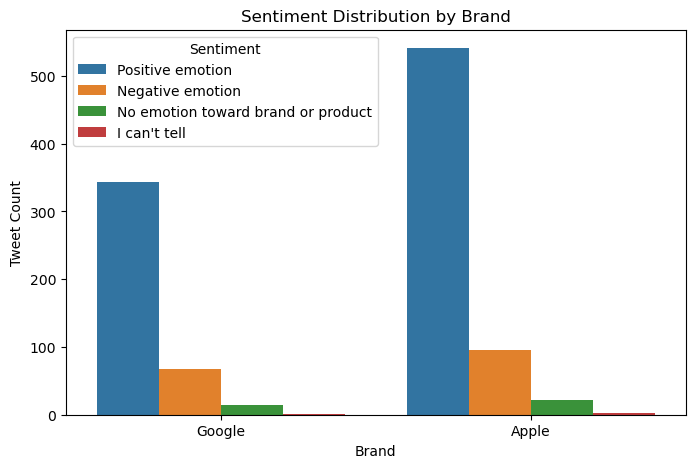

In [22]:
# plotting for sentiment distribution by brand
plt.figure(figsize=(8,5))
sns.countplot(x='emotion_in_tweet_is_directed_at', hue='is_there_an_emotion_directed_at_a_brand_or_product', data=df)
plt.title('Sentiment Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Tweet Count')
plt.legend(title='Sentiment')
plt.show()


From the distribution of sentiments both brands get a mix of sentiments with the I cant tell being the least ,the positive sentiments dominates in both brands but the Apple brand recieves more positive sentiments compared to the Google brand.

In [23]:
# checking for class imbalance 
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts(normalize=True)


is_there_an_emotion_directed_at_a_brand_or_product
Positive emotion                      0.814167
Negative emotion                      0.149954
No emotion toward brand or product    0.033119
I can't tell                          0.002760
Name: proportion, dtype: float64

From the output our classes are imbalanced with the I can't tell having extremely low count.

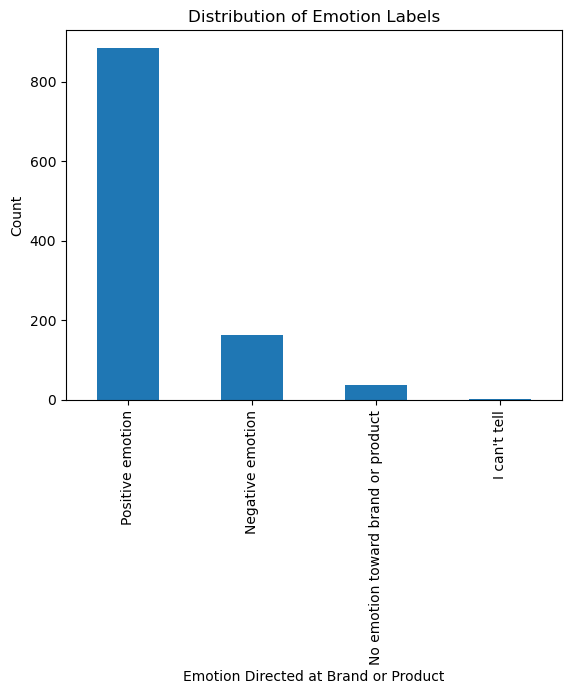

In [24]:
# Visualizing the distribution of emotion labels helps identify class imbalance.
# This guides modeling decisions such as resampling or weighting during training.

# Check the distribution of the target variable
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts().plot(kind='bar', color='#1f77b4')
plt.title('Distribution of Emotion Labels')
plt.xlabel('Emotion Directed at Brand or Product')
plt.ylabel('Count')
plt.show()


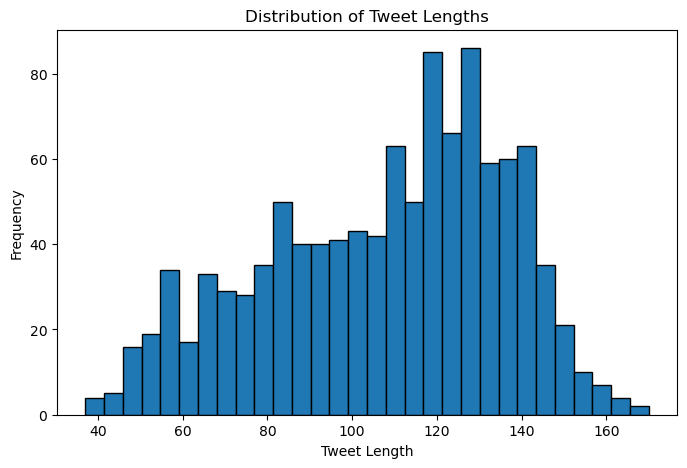

In [25]:
# visualizing the distribution of tweet lengths
plt.figure(figsize=(8,5))
plt.hist(df['tweet_length'], bins=30, edgecolor='black')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()


In [26]:
df['tweet_length'].describe()


count    1087.000000
mean      107.690892
std        28.154731
min        37.000000
25%        86.000000
50%       113.000000
75%       130.000000
max       170.000000
Name: tweet_length, dtype: float64

The distribution of tweet lengths , most tweets ranging between 80 and 130 characters.

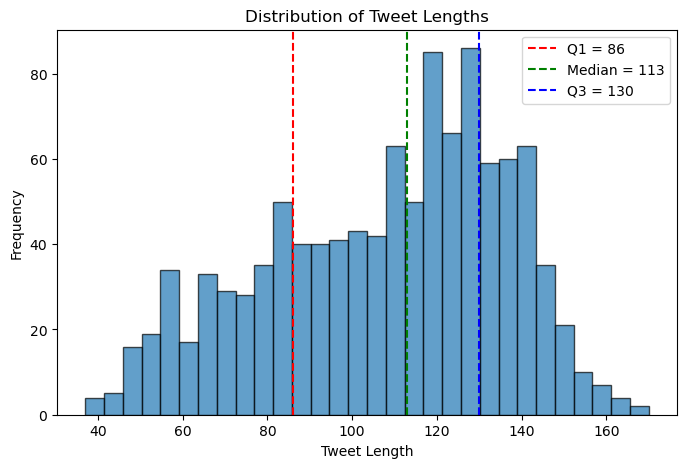

In [27]:
# plotting a more visual histogram plot for range analysis.
# Basic histogram
plt.figure(figsize=(8,5))
plt.hist(df['tweet_length'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')

# Calculating percentiles
q1 = df['tweet_length'].quantile(0.25)
median = df['tweet_length'].median()
q3 = df['tweet_length'].quantile(0.75)

# Adding vertical lines for Q1, Median, Q3 for clear data interpretation.
plt.axvline(q1, color='red', linestyle='--', label=f'Q1 = {q1:.0f}')
plt.axvline(median, color='green', linestyle='--', label=f'Median = {median:.0f}')
plt.axvline(q3, color='blue', linestyle='--', label=f'Q3 = {q3:.0f}')

plt.legend()
plt.show()


The distribution of tweet lengths is fairly concentrated, with most tweets ranging between approximately 80 and 130 characters. This range corresponds to the interquartile range (Q1–Q3), indicating that the majority of tweets are of moderate length.

## TEXT PREPROCESSING

In [28]:
import seaborn as sns
import emoji
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    f1_score
)
from sklearn.pipeline import Pipeline
import joblib
import warnings
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from nltk.stem.porter import PorterStemmer #reduce the word to its root form
from nltk.corpus import stopwords, wordnet
warnings.filterwarnings("ignore")


# Ensure required NLTK resources are downloaded
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

# Download stopwords
nltk.download('stopwords', quiet=True)


True

In [29]:

# Initialize tools
STOP_WORDS = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_tweet(text, keep_emojis=False):
    """
    Clean, tokenize, remove stopwords, and lemmatize a tweet.
    Returns a cleaned string ready for modeling.
    """
    if not isinstance(text, str):
        return ""

    # 1. Convert to lowercase
    text = text.lower()

    # 2convert emojis to text form
    if keep_emojis:
        text = emoji.demojize(text)

    # 3.Remove URLs, mentions, and hashtags
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r"@\w+", '', text)
    text = re.sub(r'#', '', text)  # removing only the '#' symbol and keeps the hashtag word

    # 4.Removing non-alphabetic characters
    text = re.sub(r"[^a-z\s]", ' ', text)

    # 5.Tokenization
    tokens = word_tokenize(text)

    # 6. Remove stopwords and short tokens
    tokens = [word for word in tokens if word not in STOP_WORDS and len(word) > 1]

    # 7.Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # 8.Joinning back to a single string
    clean_text = " ".join(tokens)

    return clean_text.strip()  # Removes any leading/trailing spaces


In [30]:
# Applying the preprocessing function to each tweet in 'tweet_text'
# stores the cleaned output in a new column 'cleaned_tweet'
df['cleaned_tweet'] = df['tweet_text'].apply(lambda x: preprocess_tweet(x, keep_emojis=True))

In [31]:
# Remove rows where the cleaned tweet is empty or contains only whitespace.
df = df[df['cleaned_tweet'].str.strip() != ""]


In [32]:
# Preview of the original vs cleaned tweets
df[['tweet_text', 'cleaned_tweet']].sample(5, random_state=42)


,tweet_text,cleaned_tweet
6037,RT @mention How Cool is this! #Apple opening a...,rt cool apple opening temporary store ipad lau...
352,".@mention Bad Apple: shows up late, Qs the pro...",bad apple show late q process poo poos idea le...
5410,"RT @mention Apparently, if you Google &quot;ad...",rt apparently google quot ad preference quot s...
7410,At the Apple Store downtown. Apple should real...,apple store downtown apple really keep store o...
5661,RT @mention DELICIOUSLY IRONIC GOOGLE PRIVACY ...,rt deliciously ironic google privacy party mad...


In [33]:
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,tweet_length,word_count,cleaned_tweet
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,131,17,great stuff fri sxsw marissa mayer google tim ...
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion,88,16,counting day sxsw plus strong canadian dollar ...
38,@mention - False Alarm: Google Circles Not Co...,Google,Negative emotion,119,18,false alarm google circle coming probably ever...
40,@mention - Great weather to greet you for #sx...,Apple,Positive emotion,144,23,great weather greet sxsw still need sweater ni...
47,HOORAY RT ÛÏ@mention Apple Is Opening A Pop-U...,Apple,Positive emotion,91,16,hooray rt apple opening pop store austin sxsw ...
...,...,...,...,...,...,...
9029,"[TOP STORY] At #SXSW, Apple schools the market...",Apple,Positive emotion,125,19,top story sxsw apple school marketing expert t...
9033,@mention yep! I can't believe they set up a po...,Apple,Positive emotion,92,20,yep believe set pop store oh wait yes sxsw apple
9048,@mention You bet man! Kindle and Apple for sur...,Apple,Positive emotion,91,17,bet man kindle apple sure pre order amazon sxsw
9064,@mention you should see the line here at #SXSW...,Apple,Positive emotion,125,24,see line sxsw front apple store nothing like t...


Bag of words

In [34]:
tweets = df['cleaned_tweet']

# Initialize CountVectorizer
vectorizer = CountVectorizer(stop_words='english')  # remove common words like 'the', 'and'
X = vectorizer.fit_transform(tweets)

# Convert to DataFrame for easy viewing
word_counts = pd.DataFrame({
    'word': vectorizer.get_feature_names_out(),
    'count': X.toarray().sum(axis=0)  # sum each column to get total occurrences
})

# Sort by frequency
word_counts = word_counts.sort_values(by='count', ascending=False)

word_counts.head(10)


,word,count
1916,sxsw,1159
83,apple,743
841,google,461
1145,link,435
1660,rt,374
1858,store,352
1560,quot,342
1029,ipad,160
1467,pop,151
120,austin,150


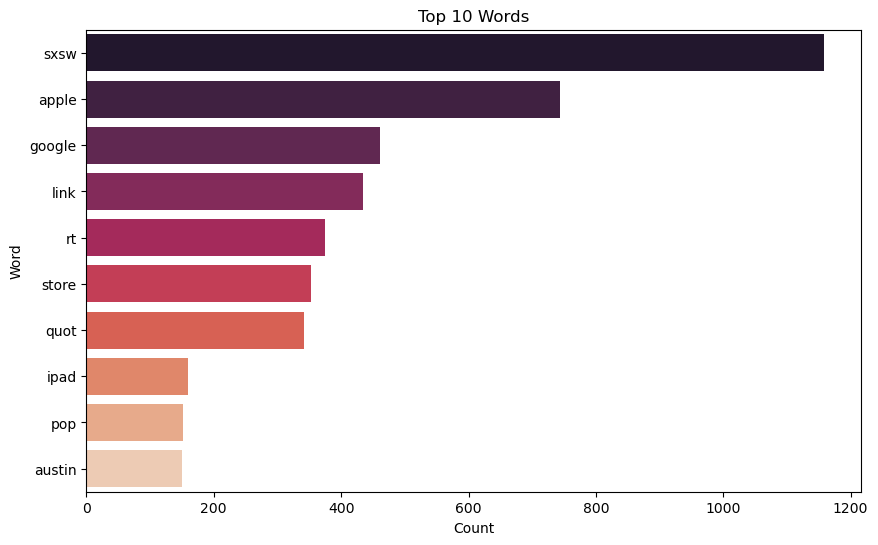

In [35]:
top_words = word_counts.head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='count', y='word', data=top_words, palette='rocket')
plt.title("Top 10 Words")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()


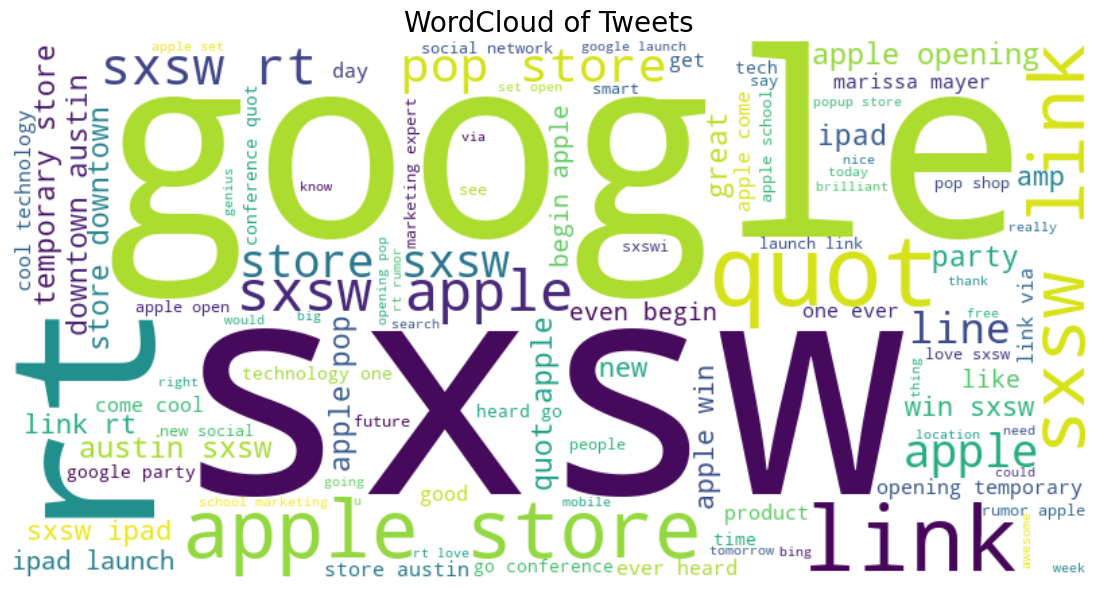

In [36]:

# Combining all cleaned tweets into a single string
text = " ".join(df['cleaned_tweet'])

# Creating a WordCloud to display top 100 words
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=STOP_WORDS,
    max_words=100
).generate(text)

# Plot
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # remove axes
plt.title("WordCloud of Tweets", fontsize=20)
plt.show()


#### Target Variable Mapping

In [37]:
# Target Variable Mapping
def map_manual_sentiment(label):
    if label == 'Positive emotion':
        return 'Positive'
    elif label == 'Negative emotion':
        return 'Negative'
    else:
        return 'Neutral'

df['manual_sentiment'] = df['is_there_an_emotion_directed_at_a_brand_or_product'].apply(map_manual_sentiment)


## BASELINE SENTIMENT ANALYSIS (VADER)

In [38]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon (run once)
nltk.download('vader_lexicon', quiet=True)

# Initialize analyzer
analyzer = SentimentIntensityAnalyzer()

# Computing polarity scores
df['vader_polarity'] = df['cleaned_tweet'].apply(
    lambda text: analyzer.polarity_scores(str(text))['compound']
)

# Defining 3-class sentiment using thresholds
def classify_vader_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['vader_sentiment'] = df['vader_polarity'].apply(classify_vader_sentiment)

# View results
df[['cleaned_tweet', 'vader_polarity', 'vader_sentiment']].head(20)

,cleaned_tweet,vader_polarity,vader_sentiment
4,great stuff fri sxsw marissa mayer google tim ...,0.6249,Positive
9,counting day sxsw plus strong canadian dollar ...,0.5106,Positive
38,false alarm google circle coming probably ever...,-0.3400,Negative
40,great weather greet sxsw still need sweater ni...,0.7506,Positive
47,hooray rt apple opening pop store austin sxsw ...,0.5106,Positive
49,wooooo apple store downtown austin open til mi...,0.0000,Neutral
55,talking link google effort allow user open sys...,0.2263,Positive
62,omfg rt heard apple pop store downtown austin ...,0.0000,Neutral
63,smile rt think apple quot pop store quot austi...,0.6369,Positive
72,rt come party google tonight sxsw link band fo...,0.6597,Positive


In [ ]:
# perform sentiment analysis using Vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

analyzer = SentimentIntensityAnalyzer()

df['vader_polarity'] = df['cleaned_tweet'].map(
    lambda text: analyzer.polarity_scores(text)['compound']
)

def classify_vader_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['vader_sentiment'] = df['vader_polarity'].apply(classify_vader_sentiment)
df.head(20)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Celine\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,tweet_length,word_count,cleaned_tweet,manual_sentiment,vader_polarity,vader_sentiment
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,131,17,great stuff fri sxsw marissa mayer google tim ...,Positive,0.6249,Positive
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion,88,16,counting day sxsw plus strong canadian dollar ...,Positive,0.5106,Positive
38,@mention - False Alarm: Google Circles Not Co...,Google,Negative emotion,119,18,false alarm google circle coming probably ever...,Negative,-0.3400,Negative
40,@mention - Great weather to greet you for #sx...,Apple,Positive emotion,144,23,great weather greet sxsw still need sweater ni...,Positive,0.7506,Positive
47,HOORAY RT ÛÏ@mention Apple Is Opening A Pop-U...,Apple,Positive emotion,91,16,hooray rt apple opening pop store austin sxsw ...,Positive,0.5106,Positive
49,wooooo!!! ÛÏ@mention Apple store downtown Aus...,Apple,Positive emotion,77,10,wooooo apple store downtown austin open til mi...,Positive,0.0000,Neutral
55,ÛÏ@mention @mention talking about {link} - Go...,Google,Positive emotion,117,17,talking link google effort allow user open sys...,Positive,0.2263,Positive
62,#OMFG! RT @mention Heard about Apple's pop-up ...,Apple,Positive emotion,120,19,omfg rt heard apple pop store downtown austin ...,Positive,0.0000,Neutral
63,#Smile RT @mention I think Apple's &quot;pop-u...,Apple,No emotion toward brand or product,145,24,smile rt think apple quot pop store quot austi...,Neutral,0.6369,Positive
72,Do it. RT @mention Come party w/ Google tonigh...,Google,Positive emotion,119,21,rt come party google tonight sxsw link band fo...,Positive,0.6597,Positive


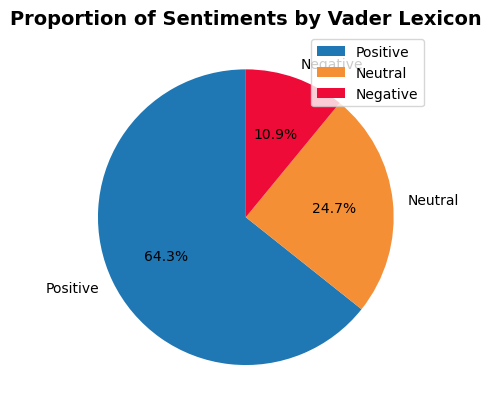

In [40]:
# Visualizing the proportions of sentiments by Vader using a pie-chart
fig, ax = plt.subplots()
colors = ('#1f77b4',"#f58f36","#EE0B38")
sentiment_props = df['vader_sentiment'].value_counts()
ax.pie(sentiment_props.values, colors=colors, labels=sentiment_props.index, autopct="%1.1f%%", startangle=90)
plt.title("Proportion of Sentiments by Vader Lexicon",fontsize=14, fontweight='bold')
plt.legend(loc='upper right')
plt.show()

Distribution of sentiments on a pie chart showing the positive class is dominating with 64.3% ,followef by the Neutral with 24.7% and the Negative being the least with 10.9%.

In [41]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

accuracy = accuracy_score(df['manual_sentiment'], df['vader_sentiment'])
f1 = f1_score(df['manual_sentiment'], df['vader_sentiment'], average='macro')
print(f"Vader Accuracy: {accuracy:.4f}")
print(f"Vader Macro F1-score: {f1:.4f}\n")
print(classification_report(df['manual_sentiment'], df['vader_sentiment']))


Vader Accuracy: 0.6201
Vader Macro F1-score: 0.4208

              precision    recall  f1-score   support

    Negative       0.49      0.36      0.41       163
     Neutral       0.05      0.36      0.09        39
    Positive       0.86      0.68      0.76       885

    accuracy                           0.62      1087
   macro avg       0.47      0.47      0.42      1087
weighted avg       0.78      0.62      0.68      1087



The Vader analysis shows an accuracy of 62%.
From the classes,the positive is generalizing better but the neutral and negative have a very poor perfomance,this calls for need to try other advanced machine learning models ,such as logistic regression e.t.c.

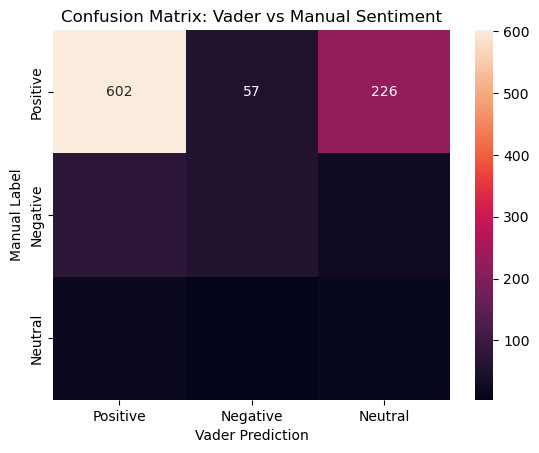

In [42]:
#Confusion matrix visualization
cm = confusion_matrix(df['manual_sentiment'], df['vader_sentiment'], labels=['Positive', 'Negative', 'Neutral'])
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Positive','Negative','Neutral'], yticklabels=['Positive','Negative','Neutral'], cmap='rocket')
plt.xlabel('Vader Prediction')
plt.ylabel('Manual Label')
plt.title('Confusion Matrix: Vader vs Manual Sentiment')
plt.show()


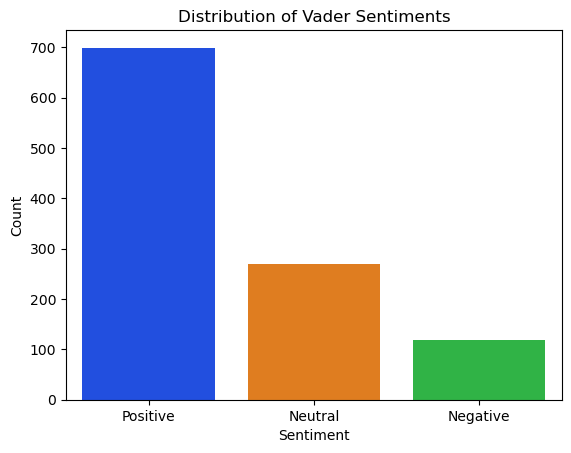

In [43]:
# distribution of Vader sentiments
sentiment_props = df['vader_sentiment'].value_counts()
sns.barplot(x=sentiment_props.index, y=sentiment_props.values, palette='bright')
plt.title("Distribution of Vader Sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


From the distribution the Positive class is dominating with over 600 count while the Negative being the least with about 100  counts.

In [44]:
# Check class distribution in the original dataset
class_counts_before = df['manual_sentiment'].value_counts()
class_counts_before


manual_sentiment
Positive    885
Negative    163
Neutral      39
Name: count, dtype: int64

## ADVANCED MODELLING

#### Handling class imbalance

In [45]:
# Checking class distribution
class_counts_before = df['manual_sentiment'].value_counts()
class_counts_before

manual_sentiment
Positive    885
Negative    163
Neutral      39
Name: count, dtype: int64

From the class distribution,the classes are imbalanced ,therefore before beginning our modelling we will first balance the classes

In [46]:
from sklearn.utils import resample

# Using only relevant columns for modeling
df_model = df[['cleaned_tweet', 'manual_sentiment']]
df_model.head()


,cleaned_tweet,manual_sentiment
4,great stuff fri sxsw marissa mayer google tim ...,Positive
9,counting day sxsw plus strong canadian dollar ...,Positive
38,false alarm google circle coming probably ever...,Negative
40,great weather greet sxsw still need sweater ni...,Positive
47,hooray rt apple opening pop store austin sxsw ...,Positive


In [47]:
# List of unique classes
classes = df_model['manual_sentiment'].unique()
classes

array(['Positive', 'Negative', 'Neutral'], dtype=object)

In [48]:
# Determining the max class size
max_size = df_model['manual_sentiment'].value_counts().max()
max_size

885

In [49]:
# Empty dataframe for balanced data
df_balanced_model = pd.DataFrame()

In [50]:
# Upsample minority classes
for label in classes:
    df_class = df_model[df_model['manual_sentiment'] == label]
    df_class_upsampled = resample(
        df_class,
        replace=True,
        n_samples=max_size,
        random_state=42
    )
    df_balanced_model = pd.concat([df_balanced_model, df_class_upsampled])

# Checking the distribution
df_balanced_model['manual_sentiment'].value_counts(normalize=True)


manual_sentiment
Positive    0.333333
Negative    0.333333
Neutral     0.333333
Name: proportion, dtype: float64

From the output ,we can see the sentiment classes are now balanced ,this ensures our model will not be biased.

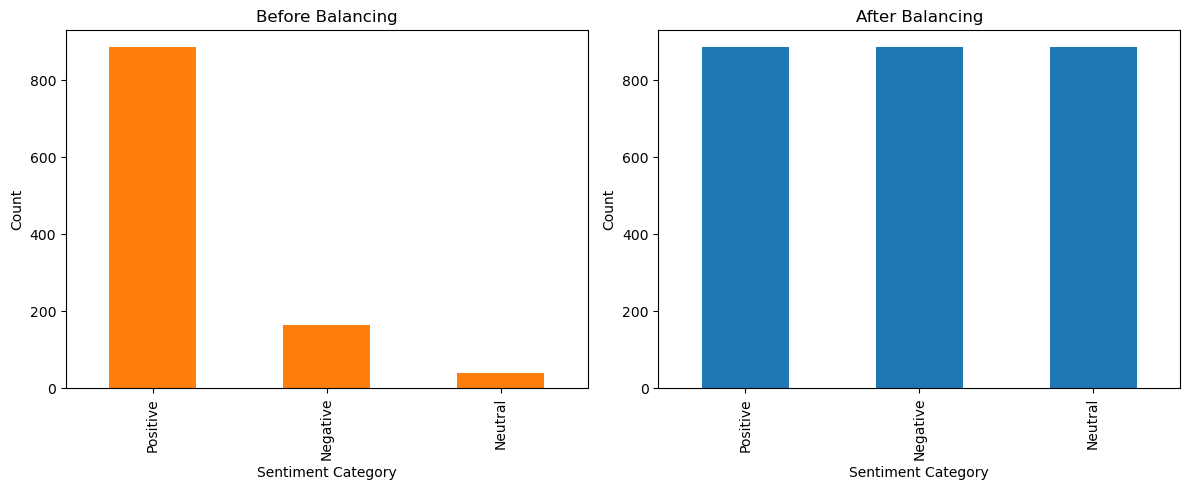

In [51]:
#Visualiznig the before and after balancing distribution of the sentiment classes.
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Before balancing
df_model['manual_sentiment'].value_counts().plot(kind='bar', ax=axes[0], color='#ff7f0e')
axes[0].set_title('Before Balancing')
axes[0].set_xlabel('Sentiment Category')
axes[0].set_ylabel('Count')

# After balancing
df_balanced_model['manual_sentiment'].value_counts().plot(kind='bar', ax=axes[1], color='#1f77b4')
axes[1].set_title('After Balancing')
axes[1].set_xlabel('Sentiment Category')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


## splitting the data

In [52]:
# splitting the data
X = df_balanced_model['cleaned_tweet']
y = df_balanced_model['manual_sentiment']

In [53]:
# performing the train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

## TEXT VECTORIZATION

In [54]:
# Converting textual data into numerical data using TF-IDF
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

 #Fitting the vectorizer on training data and transform it into TF-IDF numerical features
X_train_tfidf = tfidf.fit_transform(X_train)
# Transform test data into TF-IDF numerical features
X_test_tfidf = tfidf.transform(X_test)


### 1. Baseline logistic regression 

In [55]:
# Create a Logistic Regression pipeline
lr_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
    ('logreg', LogisticRegression(max_iter=1000))
])

# Train the pipeline
lr_pipeline.fit(X_train, y_train)


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
                ('logreg', LogisticRegression(max_iter=1000))])

In [56]:
# Predict sentiment for the test set
# Predict on the test set
y_pred_lr = lr_pipeline.predict(X_test)


In [57]:
# Accuracy and classification report
print("Accuracy:", accuracy_score(y_test,y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Accuracy: 0.975517890772128
              precision    recall  f1-score   support

    Negative       0.98      0.95      0.97       177
     Neutral       0.99      1.00      0.99       177
    Positive       0.96      0.98      0.97       177

    accuracy                           0.98       531
   macro avg       0.98      0.98      0.98       531
weighted avg       0.98      0.98      0.98       531



from the report the baseline model has an overall accuracy of 98%.looking at other metrices the positive seems to be perfoming better while the other classes have a poor perfomance.

next suggested step is to handle class imbalance.

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_lr, labels=lr_pipeline.classes_)

cm

array([[168,   1,   8],
       [  0, 177,   0],
       [  3,   1, 173]], dtype=int64)

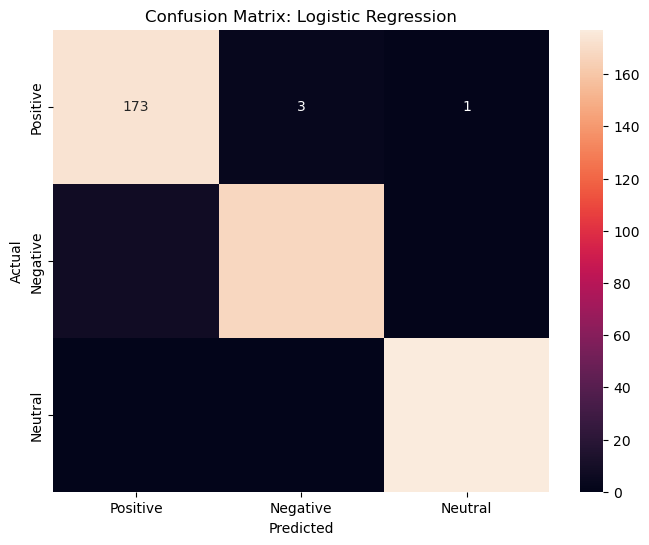

In [59]:
# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred_lr, labels=['Positive', 'Negative', 'Neutral'])
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Positive','Negative','Neutral'],
            yticklabels=['Positive','Negative','Neutral'], cmap='rocket')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Logistic Regression')
plt.show()

from the confusion matrix the :
Negative: 168 correctly classified  and a few misclassified as positive.
Neutral:it correctly classifies ,with all 177 showing perfect generalization.
Positive: 173 is correctly classified ,with only 4 misclassifications.

this shows our model is perfoming better on all classes.

#### Checking for overfitting on our logistic regression model

In [60]:
# Predicting on the training set
y_train_pred = lr_pipeline.predict(X_train)
y_test_pred = lr_pipeline.predict(X_test)

# Computing the accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Training Accuracy: 0.9882
Test Accuracy: 0.9755


this shows the model is performing well on both the training and test data

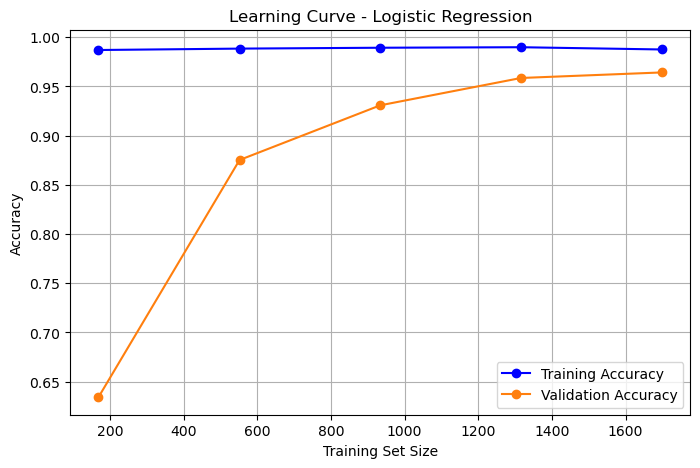

In [61]:
# Checking for overfitting / underfitting using the learning curve
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

#using the pipeline
train_sizes, train_scores, test_scores = learning_curve(
    lr_pipeline,
    X_train, 
    y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Compute mean scores across folds
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Accuracy')
plt.plot(train_sizes, test_mean, 'o-', color='#ff7f0e', label='Validation Accuracy')
plt.title('Learning Curve - Logistic Regression')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()


From the small gap at the ends of the Training and Validation shows the model is perfoming well and not overfitting.

In [62]:
# comparing the Vader model with our logistic regression model.
# VADER metrics
vader_accuracy = accuracy_score(df['manual_sentiment'], df['vader_sentiment'])
vader_f1 = f1_score(df['manual_sentiment'], df['vader_sentiment'], average='macro')

# Logistic Regression metrics
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr, average='macro')

print(f"VADER Accuracy: {vader_accuracy:.4f}, Macro F1: {vader_f1:.4f}")
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}, Macro F1: {lr_f1:.4f}")


VADER Accuracy: 0.6201, Macro F1: 0.4208
Logistic Regression Accuracy: 0.9755, Macro F1: 0.9755


Logistic regression model outperfoms the Vader model with an accuracy of 98% and macro F1 of 98% . data ,compared to the Vader that had an accuracy of 62% and Macro F1 of 42% showing an imbalance . 
Vader perfoms better on positive class and struggles with the rest of the classes.

In [63]:
# Extract TF-IDF feature names and the trained Logistic Regression model
vectorizer = lr_pipeline.named_steps['tfidf']
model = lr_pipeline.named_steps['logreg']

feature_names = vectorizer.get_feature_names_out()

# For multi-class, get coefficients for each class
for i, class_label in enumerate(model.classes_):
    coefficients = model.coef_[i]
    top_positive_words = [feature_names[j] for j in np.argsort(coefficients)[-10:]]
    top_negative_words = [feature_names[j] for j in np.argsort(coefficients)[:10]]

    print(f"\nClass: {class_label}")
    print("Top words influencing positive sentiment:", top_positive_words)
    print("Top words influencing negative sentiment:", top_negative_words)



Class: Negative
Top words influencing positive sentiment: ['rt temporary', 'google circle', 'company', 'attention', 'fascist company', 'america', 'company america', 'fascist', 'fail', 'rt google']
Top words influencing negative sentiment: ['link', 'party', 'sxsw link', 'pop', 'austin', 'popup', 'wow', 'store', 'love', 'going']

Class: Neutral
Top words influencing positive sentiment: ['link', 'actual', 'link sxsw', 'apple like', 'austin', 'pop', 'wow rt', 'rt pop', 'quot party', 'launch']
Top words influencing negative sentiment: ['day', 'rt google', 'temporary', 'opening', 'quot apple', 'get', 'sxswi', 'apple opening', 'great', 'store downtown']

Class: Positive
Top words influencing positive sentiment: ['store downtown', 'opening', 'smart', 'marketing', 'cool', 'set', 'amp', 'great', 'link', 'love']
Top words influencing negative sentiment: ['quot', 'launch', 'like', 'apple like', 'want', 'location', 'first', 'seems', 'quot party', 'fail']


## SUPPORT VECTOR MACHINE (SVM)

why SVM?

Logistic Regression gave strong baseline results, but SVM is often better at handling complex, high-dimensional text data like TF-IDF. It can pick up on subtle differences between sentiments—especially Neutral and Negative—so it’s a good choice to compare against the baseline.

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

# Build the SVM pipeline
svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
    ('svm', LinearSVC(random_state=42))
])



In [65]:
# Train on training data
svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
                ('svm', LinearSVC(random_state=42))])

In [66]:
# Predict on test data
y_pred_svm = svm_pipeline.predict(X_test)

In [67]:
# Evaluate
print("SVM Pipeline Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Pipeline Accuracy: 0.9811676082862524
              precision    recall  f1-score   support

    Negative       0.98      0.97      0.97       177
     Neutral       0.99      1.00      1.00       177
    Positive       0.97      0.98      0.97       177

    accuracy                           0.98       531
   macro avg       0.98      0.98      0.98       531
weighted avg       0.98      0.98      0.98       531



The SVM model achieved an impressive 98.1% accuracy, slightly outperforming Logistic Regression. High precision, recall, and F1-scores across all classes indicate strong generalization and effective handling of subtle sentiment differences

In [68]:
cm = confusion_matrix(y_test, y_pred_svm, labels=svm_pipeline.named_steps['svm'].classes_)
cm

array([[171,   0,   6],
       [  0, 177,   0],
       [  3,   1, 173]], dtype=int64)

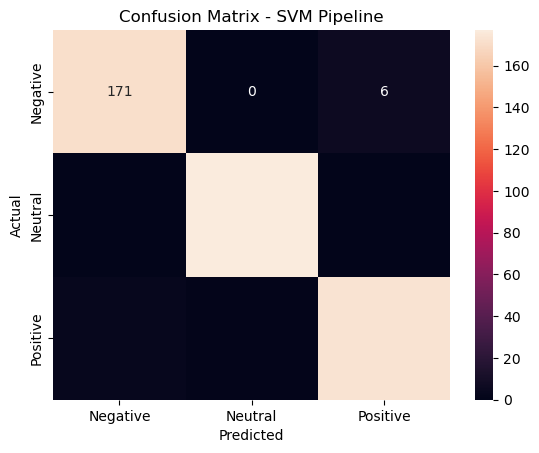

In [69]:
cm = confusion_matrix(y_test, y_pred_svm, labels=svm_pipeline.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='rocket',
            xticklabels=svm_pipeline.classes_,
            yticklabels=svm_pipeline.classes_)
plt.title('Confusion Matrix - SVM Pipeline')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


The SVM confusion matrix shows very few errors — 6 Negative tweets were misclassified as Positive, and 4 Positive tweets were slightly mixed up. Overall, the model performed very well, especially for Neutral tweets, which were all correctly predicted

checking for overfitting in the SVM MODEL

In [70]:
# Checkiiing  for overfitting in our SVM model
train_accuracy = svm_pipeline.score(X_train, y_train)
test_accuracy = svm_pipeline.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Training Accuracy: 0.9929
Test Accuracy: 0.9812


The SVM model achieved a training accuracy of 99.3% and a test accuracy of 98.1%, showing only a small difference between the two. This indicates that the model generalizes well and there is no significant overfitting.

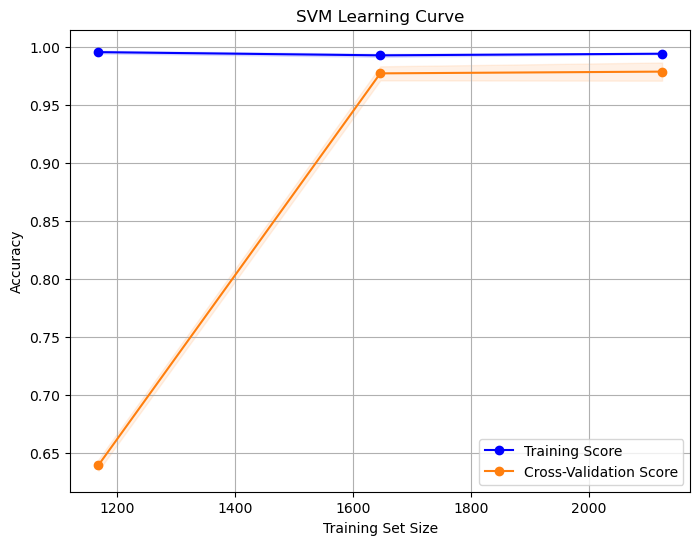

In [71]:

# Generate learning curve data for SVM pipeline
train_sizes, train_scores, test_scores = learning_curve(
    svm_pipeline, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5), random_state=42
)

# Compute mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, test_mean, 'o-', color='#ff7f0e', label='Cross-Validation Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='#ff7f0e', alpha=0.1)
plt.title("SVM Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()


- The two curves are close together, suggesting the model generalizes well and is not overfitting. As the training size increases, validation accuracy stabilizes, confirming the model’s strong and reliable performance across the dataset

- Logistic Regression reached around 97.5% accuracy, while SVM slightly improved to about 98.1%. The learning curves for both models show minimal gaps between training and validation scores, indicating low overfitting. However, SVM showed a slightly stronger generalization capability, making it a more robust choice for sentiment classification in this dataset.

In [72]:
#Top words influencing sentiments in our SVM model

# Extract TF-IDF feature names and the trained SVM model
vectorizer = svm_pipeline.named_steps['tfidf']
model = svm_pipeline.named_steps['svm']

feature_names = vectorizer.get_feature_names_out()

# For multi-class SVM, extract coefficients for each class
for i, class_label in enumerate(model.classes_):
    coefficients = model.coef_[i]
    top_positive_words = [feature_names[j] for j in np.argsort(coefficients)[-10:]]
    top_negative_words = [feature_names[j] for j in np.argsort(coefficients)[:10]]

    print(f"\nClass: {class_label}")
    print("Top words influencing positive sentiment:", top_positive_words)
    print("Top words influencing negative sentiment:", top_negative_words)



Class: Negative
Top words influencing positive sentiment: ['suck', 'suck link', 'sxsw suck', 'attention', 'fail', 'perfect attention', 'attention detail', 'detail rt', 'rt google', 'rt temporary']
Top words influencing negative sentiment: ['rt apple', 'link', 'rt pop', 'wow rt', 'party', 'love', 'wow', 'great', 'love sxsw', 'quot via']

Class: Neutral
Top words influencing positive sentiment: ['wow', 'denim', 'sxsw apple', 'gadget', 'launch', 'quot party', 'link photo', 'link sxsw', 'wow rt', 'rt pop']
Top words influencing negative sentiment: ['rt google', 'detail rt', 'attention detail', 'perfect attention', 'detail', 'perfect', 'attention', 'gt', 'opening', 'apple ipad']

Class: Positive
Top words influencing positive sentiment: ['love sxsw', 'cool', 'party', 'amp', 'marketing', 'set', 'smart', 'great', 'link', 'love']
Top words influencing negative sentiment: ['rt temporary', 'link sxsw', 'fail', 'link photo', 'launch', 'want', 'suck', 'suck link', 'sxsw suck', 'sxsw apple']


### NAIVE-BAYES

In [73]:
from sklearn.naive_bayes import MultinomialNB
# Build a Nive-Bayes pipeline
nb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
    ('nb', MultinomialNB())
])

#Training the pipeline
nb_pipeline.fit(X_train, y_train)



Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
                ('nb', MultinomialNB())])

In [74]:
# Predictions
y_pred_nb = nb_pipeline.predict(X_test)


In [75]:

# Metrics
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.9397363465160076

Classification Report:
               precision    recall  f1-score   support

    Negative       0.96      0.91      0.94       177
     Neutral       0.89      1.00      0.94       177
    Positive       0.98      0.91      0.94       177

    accuracy                           0.94       531
   macro avg       0.94      0.94      0.94       531
weighted avg       0.94      0.94      0.94       531



The Naive Bayes model achieved an accuracy of 93.97% with a macro F1-score of 0.94, with a  strong and balanced performance across all classes. It achieved high precision for Negative 0.96 and Positive 0.98 sentiments, and perfectly recalled the Neutral class 1.00. However, it performed slightly below SVM and Logistic Regression.

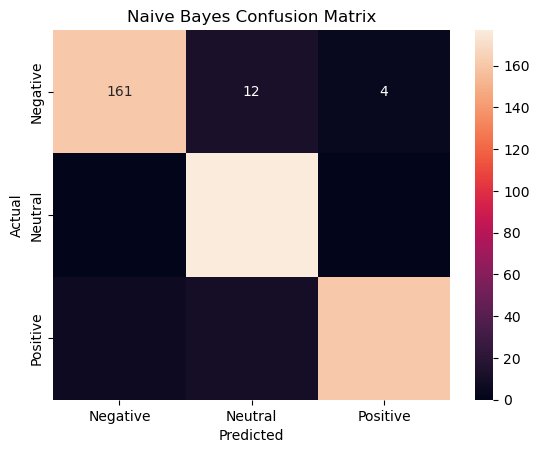

In [76]:
cm = confusion_matrix(y_test, y_pred_nb, labels=nb_pipeline.classes_)

sns.heatmap(cm, annot=True, fmt='d', cmap='rocket',
            xticklabels=nb_pipeline.classes_,
            yticklabels=nb_pipeline.classes_)
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## MODELS EVALUATION and SELECTION

In [77]:
# Model evaluation and selction of the best model
# Get predictions from each pipeline
y_pred_lr = lr_pipeline.predict(X_test)
y_pred_svm = svm_pipeline.predict(X_test)
y_pred_nb = nb_pipeline.predict(X_test)

#VADER
vader_accuracy = accuracy_score(df['manual_sentiment'], df['vader_sentiment'])
vader_f1 = f1_score(df['manual_sentiment'], df['vader_sentiment'], average='macro')


In [78]:
# Storing the model predictions in a dictionary
models = {
    "VADER (Lexicon)": None,
    "Logistic Regression": y_pred_lr,
    "SVM": y_pred_svm,
    "Naive Bayes": y_pred_nb
}

In [79]:
for name, obj in models.items():
    print(name, type(obj))


VADER (Lexicon) <class 'NoneType'>
Logistic Regression <class 'numpy.ndarray'>
SVM <class 'numpy.ndarray'>
Naive Bayes <class 'numpy.ndarray'>


In [80]:
# Computing accuracy and F1-score for each model
results = {}

for name, preds in models.items():
    if name == "VADER (Lexicon)":
        results[name] = {
            "Accuracy": vader_accuracy,
            "F1-score": vader_f1
        }
    else:
        results[name] = {
            "Accuracy": accuracy_score(y_test, preds),
            "F1-score": f1_score(y_test, preds, average='macro')
        }


In [81]:
#Creating a DataFrame for comparison
results_df = pd.DataFrame(results).T.sort_values(by="Accuracy", ascending=False)
display(results_df)


,Accuracy,F1-score
SVM,0.981168,0.981151
Logistic Regression,0.975518,0.975460
Naive Bayes,0.939736,0.939685
VADER (Lexicon),0.620055,0.420786


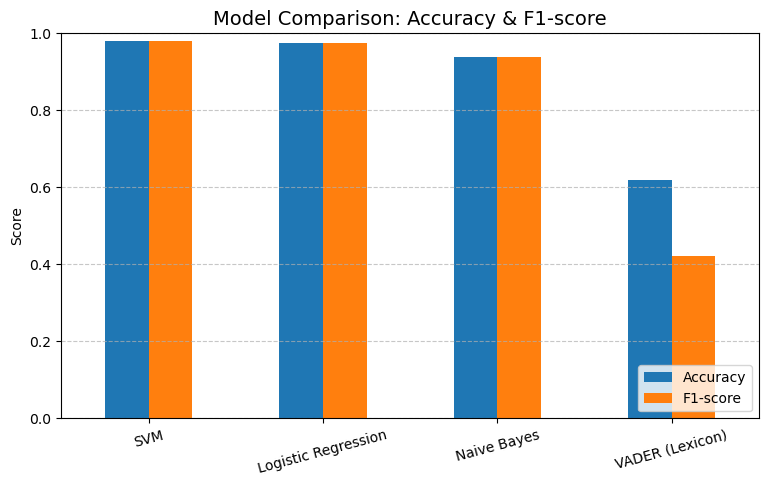

 Best Model: SVM with Accuracy = 0.9812


In [82]:
#Visualization on the comparison of the models perfomance
results_df.plot(kind='bar', figsize=(9,5), color=['#1f77b4', '#ff7f0e'])
plt.title('Model Comparison: Accuracy & F1-score', fontsize=14)
plt.ylabel('Score')
plt.xticks(rotation=15)
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

best_model = results_df.index[0]
best_acc = results_df.iloc[0, 0]
print(f" Best Model: {best_model} with Accuracy = {best_acc:.4f}")


From our comparison of all models tested, SVM achieved the highest accuracy of 98.12%, slightly outperforming Logistic Regression of 97.55% and Naive Bayes of 93.97%.
This shows that SVM handled the high-dimensional TF-IDF features most effectively, making it the best overall model for this multiclass sentiment classification task.

# Conclusion and Recomendation

#### Conclusion
- This project explored different models for sentiment analysis, including VADER, Naive Bayes, Logistic Regression, and SVM. The SVM model performed best, achieving an accuracy of 0.9812, showing strong ability to understand patterns in the text. Overall, machine learning models, especially those using TF-IDF features, performed much better than rule-based approaches like VADER.

#### Recommendations
- Use SVM as the main model for sentiment classification as it perfomed better than other models.
- Add tools like LIME to explain model predictions.
- Keep improving the model with new data to maintain accuracy.